In [ ]:

from decimal import Decimal

import requests
from order_book import OrderBook

ob = OrderBook()

# get some orderbook data
data = requests.get("https://api.pro.coinbase.com/products/BTC-USD/book?level=2").json()

ob.bids = {Decimal(price): size for price, size, _ in data['bids']}
ob.asks = {Decimal(price): size for price, size, _ in data['asks']}

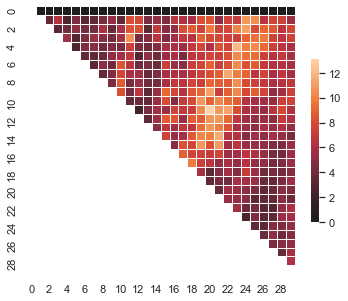

In [1]:
import pandas as pd
from backtesting import *

df = pd.read_csv('/Users/Christian.Avart/Desktop/temp_df.csv')
eth_series = list(df['eth_Last'][-500:])

mean_return, mat = parameter_grid_search(eth_series, 30)
plot_mat(mat)

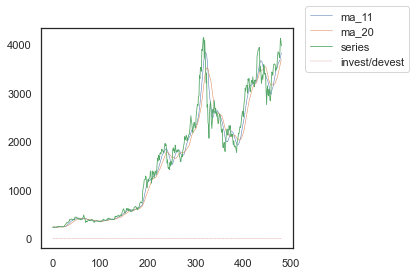

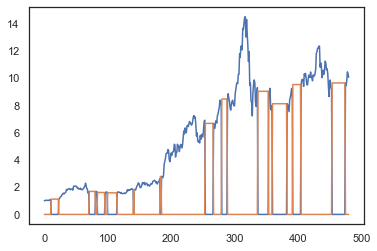

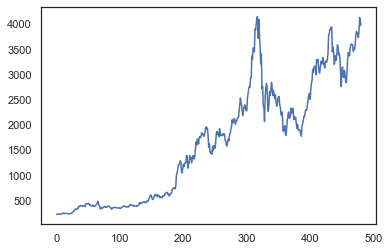

17.97087685976575 10.048746398238798


In [3]:
chk_size_1 = 20
chk_size_2 = 11
stat_dict = get_comp_ma(eth_series, chk_size_1=chk_size_1, chk_size_2=chk_size_2)
stat_series_1, stat_series_2, cut_series = stat_dict['stat_series_1'], stat_dict['stat_series_2'], stat_dict['cut_series']
invest_func = invest_with_sma(chk_size_1=chk_size_1, chk_size_2=chk_size_2)
invest_period = np.array(list(invest_func(eth_series)))
invest_period_for_plot = invest_period * np.max(cut_series)
fig, ax = plot_mas(**stat_dict)
ax.plot(invest_period[chk_size_2-1:], label='invest/devest', linewidth=0.3, linestyle='--')
plt.legend(loc=(1.05, 0.8))
plt.tight_layout()
plt.show()

period_rate_A = values_to_percent_growth(cut_series)
period_rate_B = [0] * len(cut_series)

val_A, val_B = investment_over_period(period_rates_A=period_rate_A,
                                      period_rates_B=period_rate_B,
                                      fees_func_AB=None,
                                      period_end_balance=invest_period,
                                      initial_investment_A=1,
                                      initial_investment_B=0)

plt.plot(val_A)
plt.plot(val_B)
plt.show()
plt.plot(cut_series)
plt.show()

total = np.array(val_A) + np.array(val_B)
print(cut_series[-1]/cut_series[0], total[-1])